<a href="https://colab.research.google.com/github/ataei0/DANA/blob/master/pre2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading data**

First of all, we load our npz data to make sure what are its contents

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy import load

Data = load('/content/drive/MyDrive/Matrix Data/sparse_matrix.npz')
lst = Data.files
for item in lst:
    print(item)
    print(Data[item])

indices
[ 11103  31853  31854 ... 276253 368921 384959]
indptr
[        0       192       228 ... 113376415 113376545 113376558]
format
b'csr'
shape
[933095 398351]
data
[ 1.75086936 12.19738324 12.20355765 ... 18.7720261  34.64588635
 21.07869619]


We have a csr_matrix (row compressed) data;
to work with this data, we use scipy library as bellow

In [3]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from scipy import sparse
import numpy as np

temp_data = np.load('/content/drive/MyDrive/Matrix Data/sparse_matrix.npz')
M_data = sparse.csr_matrix((temp_data['data'], temp_data['indices'], temp_data['indptr']), shape = temp_data['shape']) 

In [ ]:
M_data[3]

<1x398351 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [5]:
M_data.getcol(0)

<933095x1 sparse matrix of type '<class 'numpy.float64'>'
	with 156 stored elements in Compressed Sparse Row format>

each column contains a lot of 0 terms, for getting a sense of our data we look at non-zero elemnts in it.

In [28]:
from scipy.sparse import csr_matrix
with open ('/content/drive/MyDrive/data0.txt', 'w') as f:
  for i in range(398351):
    f.write('Row: ' + str(i))
    f.write(str(csr_matrix(M_data.getcol(i))))
    f.write('\n')


KeyboardInterrupt: ignored

# ploting data

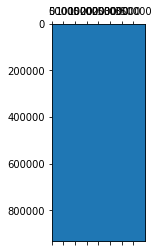

In [ ]:
import matplotlib.pyplot as plt
plt.spy(M_data)
plt.show()

In [ ]:
!pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 5.7 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=55718d4d83cf8f5648504e779caff20b374a30755fec61b1cb79abf970c32819
  Stored in directory: /root/.cache/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape


In [ ]:
!pip uninstall umap
!pip install umap-learn

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.8/dist-packages/umap/__pycache__/layouts.rdist-30.py38.1.nbc
    /usr/local/lib/python3.8/dist-packages/umap/__pycache__/layouts.rdist-30.py38.nbi
    /usr/local/lib/python3.8/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.8/dist-packages/umap/distances.py
    /usr/local/lib/python3.8/dist-packages/umap/layouts.py
    /usr/local/lib/python3.8/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.8/dist-packages/umap/plot.py
    /usr/local/lib/python3.8/dist-packages/umap/sparse.py
    /usr/local/lib/python3.8/dist-packages/umap/spectral.py
    /usr/local/lib/python3.8/dist-packages/umap/umap_.py
    /usr/local/lib/python3.8/dist-packages/umap/utils.py
    /usr/local/lib/python3.8/dist-packages/u

In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(M_data)
umap.plot.points(mapper, values=np.arange(900000), theme='viridis')

# Normal check

In [29]:
from scipy.sparse import csr_matrix
print(csr_matrix(M_data.getcol(1)))

  (2, 0)	1.9791656970814844
  (19, 0)	3.422634003956647
  (26, 0)	0.5851951576104653
  (34, 0)	2.7236897033937715
  (40, 0)	3.4459044427326626
  (57, 0)	2.846047203797674
  (58, 0)	1.9338552598495222
  (70, 0)	3.3770234430243455
  (79, 0)	7.884570894487485
  (83, 0)	1.3959050335455176
  (86, 0)	2.261801743482552
  (94, 0)	13.854992688958108
  (102, 0)	3.175985917412672
  (115, 0)	8.38920485988784
  (125, 0)	2.085011808590095
  (143, 0)	1.6240227647202088
  (147, 0)	9.201510636401729
  (159, 0)	2.7911891627733723
  (176, 0)	3.670505887683686
  (209, 0)	0.7597674762451476
  (216, 0)	5.256764986757091
  (219, 0)	12.968687644147057
  (255, 0)	2.1110656882121233
  (259, 0)	0.2383852387538654
  (260, 0)	13.87606640125658
  :	:
  (932791, 0)	2.193286252773407
  (932792, 0)	1.3026248360419603
  (932811, 0)	2.2821709250657056
  (932833, 0)	17.03764641471179
  (932840, 0)	2.0679969132421543
  (932864, 0)	2.465338935638288
  (932904, 0)	2.8783738143429396
  (932906, 0)	6.618192602735019
  (932912

We should check the sum of columns not to be 1, so its not normalized over columns.

In [16]:
M_data.sum(axis=0)

matrix([[5.99386637e+02, 2.90973254e+05, 3.30081082e+04, ...,
         2.84721641e+01, 2.96022720e+01, 3.07104059e+01]])

# Normalizing

we attemp to normalize our data with 2 different ways using skleran library:


> 1. over columns (M_data_normalized_C is its sparse matrix)


> 2. over both columns and rows (M_data_normalized_RC is its sparse matrix)





In [7]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9b5cc14d2184d7db3f161b5cceb819e09092151b9e58c3538d0cc69c586d5f6c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [8]:
from sklearn import *
from sklearn.preprocessing import normalize
#normalizing data over columns:
M_data_normalized_C = normalize(M_data, norm='l1', axis=0)
#normalizing data over rows:
M_data_normalized_R = normalize(M_data, norm='l1', axis=1)

In [10]:
from scipy.sparse import csr_matrix
print(csr_matrix(M_data_normalized_C.getcol(76454)))

  (14934, 0)	0.03515021992374439
  (70153, 0)	0.021820576828983265
  (87521, 0)	0.010194105201996652
  (178045, 0)	0.10129099121922339
  (191205, 0)	0.003980258091772798
  (199286, 0)	0.018018729166719993
  (272219, 0)	0.020423018309388842
  (322829, 0)	0.33682884892381654
  (337739, 0)	0.04646005398316955
  (347354, 0)	0.012683272279241707
  (474496, 0)	0.3181580240625511
  (475116, 0)	0.007183232565226506
  (594389, 0)	0.04254290903916482
  (724324, 0)	0.014715637516529496
  (845638, 0)	0.010550122888470913


In [11]:
M_data_normalized_C.getcol(654).sum(axis=0)

matrix([[1.]])

In [13]:
M_data_normalized_R[654].sum(axis=1)

matrix([[1.]])

In [14]:
#normalizing over both columns and rows:
temp = M_data_normalized_C.multiply(M_data_normalized_R)
M_data_normalized_RC = temp.sqrt()

In [15]:
print(csr_matrix(M_data_normalized_RC.getcol(76454)))

  (14934, 0)	0.014630636352057526
  (70153, 0)	0.009201580715149434
  (87521, 0)	0.004145968013510361
  (178045, 0)	0.0434490843479452
  (191205, 0)	0.0015932870272804202
  (199286, 0)	0.007158215388002847
  (272219, 0)	0.008356592754383623
  (322829, 0)	0.20499651699158689
  (337739, 0)	0.019739228197798338
  (347354, 0)	0.005136670797446522
  (474496, 0)	0.1696265291772877
  (475116, 0)	0.0028400792672730307
  (594389, 0)	0.01703445933830228
  (724324, 0)	0.005822699657967096
  (845638, 0)	0.004130527049418551


# Column wise Difference Calculation